<a href="https://colab.research.google.com/github/rubanzasilva/mnist_basics/blob/main/a_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.2 MB/s eta 0:00:00
Mounted at /content/gdrive


In [2]:
#hide
from fastai.vision.all import *
from fastbook import *
import numpy as np
import pandas as pd

matplotlib.rc('image', cmap='Greys')

In [3]:
path = untar_data(URLs.MNIST)

In [4]:
#hide
Path.BASE_PATH = path

Fastai high level API.

In [10]:
dls = ImageDataLoaders.from_folder(path, valid_pct=0.2)
dls.valid_ds.items[:3]

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


[Path('training/9/40293.png'),
 Path('training/0/859.png'),
 Path('training/5/54862.png')]

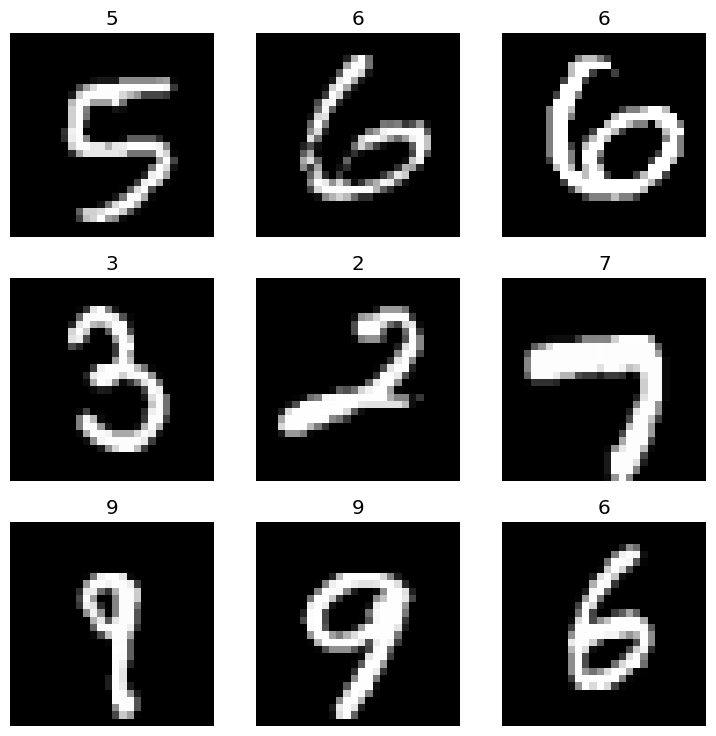

In [11]:
dls.show_batch()

In [12]:
learn = vision_learner(dls, resnet34,loss_func=F.cross_entropy, metrics=accuracy)
learn.fine_tune(1)

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:02<00:00, 39.7MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.632969,0.442631,0.859357,13:11


epoch,train_loss,valid_loss,accuracy,time
0,0.087439,0.051929,0.983571,28:04


In [14]:
learn.recorder.values[-1][2]

0.9835714101791382

In [18]:
dls.train_ds.items[:1]
#dls.valid_ds.items[:3]

[Path('training/2/49702.png')]

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


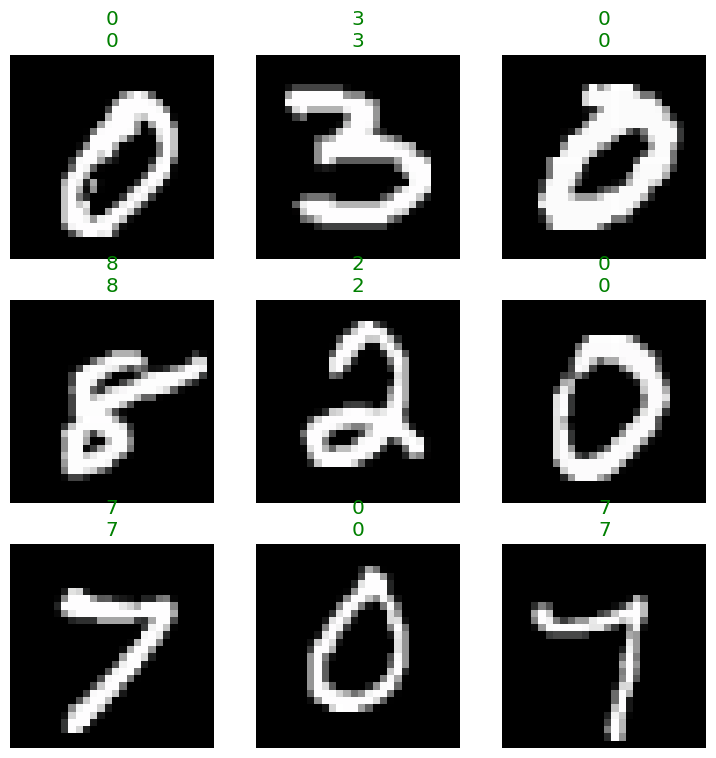

In [20]:
learn.show_results()

In [21]:
learn.predict(path/'training/2/49702.png')

('2',
 tensor(2),
 tensor([6.7236e-07, 9.1687e-06, 9.9997e-01, 5.4176e-06, 7.6186e-08, 2.1595e-06, 1.3101e-07, 1.4262e-05, 1.6605e-06, 8.2538e-08]))

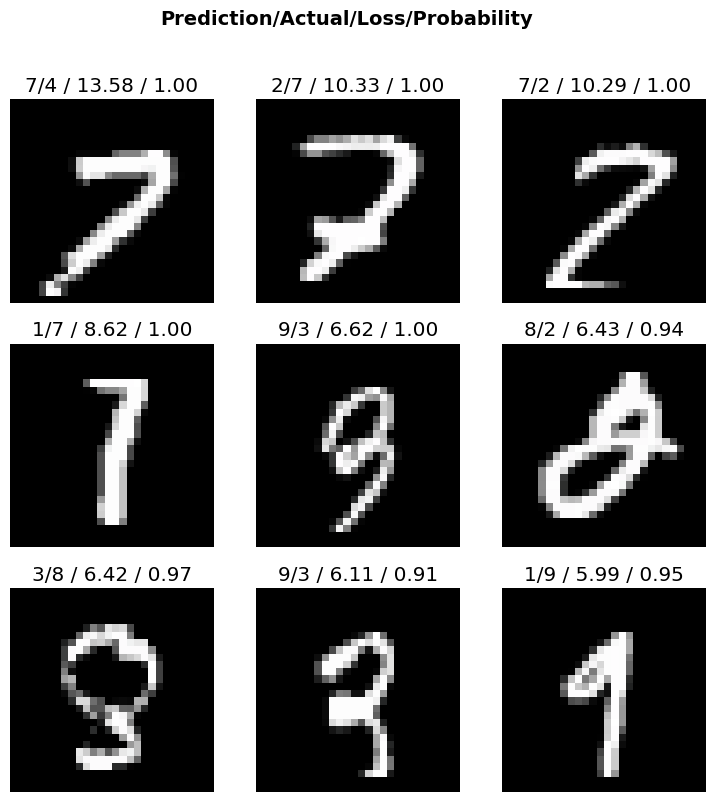

In [22]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9)

In [19]:
probs, actuals = learn.get_preds(dl=dls.test_dl(df_test))

NameError: name 'df_test' is not defined

In [ ]:
print(f'Accuracy on test set {float(accuracy(probs, actuals)): 0.2%}')

In [ ]:
#codecell c
train_x = torch.cat([stacked_zeros,stacked_ones,stacked_twos,stacked_threes,stacked_fours,stacked_fives,stacked_sixes,stacked_sevens,stacked_eights,stacked_nines]).view(-1, 28*28)
train_y = tensor( [0]*len(zeros) + [1]*len(ones) + [2]*len(twos) + [3]*len(threes) + [4]*len(fours) + [5]*len(fives) + [6]*len(sixes) + [7]*len(sevens) + [8]*len(eights) + [9]*len(nines))
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape,y
valid_x = torch.cat([valid_stacked_zeros,valid_stacked_ones,valid_stacked_twos,valid_stacked_threes,valid_stacked_fours,valid_stacked_fives,valid_stacked_sixes,valid_stacked_sevens,valid_stacked_eights,valid_stacked_nines]).view(-1, 28*28)
valid_y = tensor( [0]*len(valid_zeros) + [1]*len(valid_ones) + [2]*len(valid_twos) + [3]*len(valid_threes) + [4]*len(valid_fours) + [5]*len(valid_fives) + [6]*len(valid_sixes) + [7]*len(valid_sevens) + [8]*len(valid_eights) + [9]*len(valid_nines))
valid_dset = list(zip(valid_x,valid_y))

#define linear model
def linear1(xb):
  return xb@weights + bias

simple_net = nn.Sequential(
nn.Linear(28*28,50),
nn.ReLU(),
nn.Linear(50,10)
)

#define function to Initialize parameters and return random parameters
#requires_grad tells PyTorch to track gradients when init_params is used

def init_params(size,std=1.0):
  return (torch.randn(size)*std).requires_grad_()


weights = init_params((28*28,10))
bias = init_params(10)

dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

valid_dl = DataLoader(valid_dset, batch_size=256)

dls = DataLoaders(dl, valid_dl)

learner = Learner(dls,simple_net,opt_func=SGD,loss_func=nn.CrossEntropyLoss(),metrics=accuracy,lr=0.001)

learner.fit(10,0.1)

#using the train images as activations, then applying softmax to that
#batch_sm_acts = torch.softmax(batch,dim=1)
#batch_sm_acts

#idx = range(4)
#batch_sm_acts[idx, label_batch]



epoch,train_loss,valid_loss,accuracy,time
0,0.368421,6.848666,0.100900,00:01
1,0.278344,5.651857,0.101400,00:01
2,0.191153,4.804274,0.146300,00:01
3,0.152159,4.226469,0.225700,00:01
4,0.128899,4.110898,0.226000,00:01
5,0.118523,4.114989,0.226300,00:01
6,0.112084,4.059165,0.240500,00:01
7,0.116612,3.810483,0.277500,00:01
8,0.111646,3.844285,0.302500,00:01
9,0.109778,3.984809,0.267300,00:01


codecell a version b

In [ ]:
path_train = path/'training'
path_valid = path/'testing'

train_x = get_image_files(path_train).sorted()
train_x = [(tensor(Image.open(element)).float()) / 255 for element in train_x ]
train_x = torch.stack(train_x).view(-1,28*28)

train_y = [int(element.parent.name) for element in get_image_files(path_train).sorted()]
train_y = tensor(train_y)

dl = DataLoader(list(zip(train_x,train_y)),batch_size=256,shuffle=True)

valid_x = get_image_files(path_valid).sorted()
valid_x = [(tensor(Image.open(element)).float()) / 255 for element in valid_x ]
valid_x = torch.stack(valid_x).view(-1,28*28)

valid_y = [int(element.parent.name) for element in get_image_files(path_valid).sorted()]
valid_y = tensor(valid_y)

dl_valid = DataLoader(list(zip(valid_x,valid_y)),batch_size=256,shuffle=True)
dls = DataLoaders(dl,dl_valid)

simple_net = nn.Sequential(
nn.Linear(28*28,50),
nn.ReLU(),
nn.Linear(50,10)
)

learner = Learner(dls,simple_net,opt_func=SGD,loss_func=nn.CrossEntropyLoss(),metrics=accuracy,lr=0.001)

learner.fit(10,0.1)

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


epoch,train_loss,valid_loss,accuracy,time
0,0.461113,0.376712,0.896700,00:01
1,0.337488,0.320396,0.906000,00:01
2,0.304718,0.276135,0.921400,00:01
3,0.275385,0.254352,0.927000,00:01
4,0.240320,0.235078,0.931800,00:01
5,0.225280,0.219770,0.936700,00:01
6,0.218850,0.209258,0.939100,00:02
7,0.201016,0.194243,0.942900,00:02
8,0.190370,0.185114,0.944700,00:01
9,0.184857,0.178726,0.948100,00:01


In [ ]:
learner.recorder.values[-1][2]


0.9480999708175659

In [ ]:
train_x[0]

data entry codecell D

In [ ]:
# Load MNIST data
path = untar_data(URLs.MNIST)
Path.BASE_PATH = path

# Load all digit paths
digits_paths = [
	(path/"training"/str(digit)).ls().sorted()
	for digit in range(10)
]

# Convert images to tensors
digit_tensors = [
    [tensor(Image.open(f)) for f in paths]
    for paths in digits_paths
]

# Convert each digit list into one tensor
stacked_digits = [
    torch.stack(digits).float()/255
    for digits in digit_tensors
]

# Combine all digits
digits_x = torch.cat(stacked_digits).view(-1, 28 * 28)
digits_y = tensor(
    list(chain.from_iterable([[i] * len(paths) for i, paths in enumerate(digits_paths)]))
)
dataset = list(zip(digits_x, digits_y))

# Create validation set
mini_batch_size = 256
valid_split = 0.2
split_index = int(len(digits_x) * valid_split)
shuffled_indices = torch.randperm(len(digits_x))
train_indices, valid_indices = shuffled_indices[split_index:], shuffled_indices[:split_index]

train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(valid_indices)

train_dataset = DataLoader(dataset, batch_size=mini_batch_size, sampler=train_sampler)
valid_dataset = DataLoader(dataset, batch_size=mini_batch_size, sampler=valid_sampler)

# Set up testing dataset
testing_paths = [(path/"testing"/str(digit)).ls().sorted() for digit in range(10)]
testing_tensors = [
    [tensor(Image.open(f)) for f in paths]
    for paths in testing_paths
]
stacked_testing = [
    torch.stack(digits).float()/255
    for digits in testing_tensors
]
testing_x = torch.cat(stacked_testing).view(-1, 28 * 28)
testing_y = tensor(
    list(chain.from_iterable([[i] * len(paths) for i, paths in enumerate(testing_paths)]))
)
testing_dataset_temp = list(zip(testing_x, testing_y))
testing_dataset = DataLoader(testing_dataset_temp, batch_size=256)


code cell a version a

In [ ]:
train_path = (path/'training').ls().sorted()

#opens iamges and converts to tensors
tensors = [(tensor(Image.open(o)), int(path.name)) for path in train_path for o in path.ls()]
np.random.shuffle(tensors)

index = math.floor(len(tensors) * 0.8)
train, valid = tensors[:index], tensors[index:]
train_x = torch.cat([train[i][0].view(-1, 784).float()/255 for i in range(len(train))])
train_y = tensor([train[i][1] for i in range(len(train))])
dset = list(zip(train_x, train_y))
valid_x = torch.cat([valid[i][0].view(-1, 784).float()/255 for i in range(len(valid))])
valid_y = tensor([valid[i][1] for i in range(len(valid))])
valid_dset = list(zip(valid_x, valid_y))

#define linear model
linear_model = nn.Linear(28*28,10)

simple_net = nn.Sequential(
nn.Linear(28*28,50),
nn.ReLU(),
nn.Linear(50,10)
)


dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

valid_dl = DataLoader(valid_dset, batch_size=256)

dls = DataLoaders(dl, valid_dl)

learner = Learner(dls,simple_net,opt_func=SGD,loss_func=nn.CrossEntropyLoss(),metrics=accuracy,lr=0.001)

learner.fit(10,0.1)

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


epoch,train_loss,valid_loss,accuracy,time
0,0.562912,0.424709,0.889917,00:01
1,0.377898,0.339162,0.905833,00:01
2,0.332767,0.304750,0.914333,00:01
3,0.305450,0.280500,0.920833,00:01
4,0.283273,0.260415,0.928083,00:01
5,0.264616,0.244443,0.933250,00:01
6,0.248602,0.231152,0.936167,00:01
7,0.234461,0.219698,0.940333,00:01
8,0.221855,0.209561,0.943250,00:01
9,0.210606,0.200637,0.944917,00:02


In [ ]:
learner.recorder.values[-1][2]


0.9449166655540466

In [ ]:
(path/'training/3/11216.png').ls()

(#6131) [Path('training/3/11216.png'),Path('training/3/19548.png'),Path('training/3/30254.png'),Path('training/3/48360.png'),Path('training/3/1119.png'),Path('training/3/29642.png'),Path('training/3/9636.png'),Path('training/3/29357.png'),Path('training/3/52864.png'),Path('training/3/45400.png')...]

In [ ]:
learner.predict(path/'training/3/11216.png')

TypeError: object of type 'PosixPath' has no len()

In [ ]:
interp = Interpretation.from_learner(learner)
interp.plot_top_losses(9)

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


AttributeError: 'list' object has no attribute 'items'

In [ ]:
learner.show_results()

AttributeError: 'list' object has no attribute 'show_results'

In [ ]:
dls.show_batch()

AttributeError: 'list' object has no attribute 'show_batch'

In [ ]:
train_x.shape

torch.Size([48000, 784])

In [ ]:
train_y.shape

torch.Size([48000])

Building the model

In [ ]:
#define linear model
linear_model = nn.Linear(28*28,10)

simple_net = nn.Sequential(
nn.Linear(28*28,50),
nn.ReLU(),
nn.Linear(50,10)
)


dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

valid_dl = DataLoader(valid_dset, batch_size=256)

dls = DataLoaders(dl, valid_dl)

learner = Learner(dls,simple_net,opt_func=SGD,loss_func=nn.CrossEntropyLoss(),metrics=accuracy,lr=0.001)

learner.fit(10,0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.564510,0.440063,0.883917,00:01
1,0.364068,0.350490,0.903583,00:01
2,0.316225,0.317658,0.911083,00:01
3,0.288714,0.296043,0.917250,00:01
4,0.267556,0.279055,0.921917,00:01
5,0.249755,0.264667,0.925333,00:01
6,0.234314,0.251879,0.927833,00:01
7,0.220600,0.240700,0.930000,00:01
8,0.208489,0.230586,0.932583,00:01
9,0.197724,0.221671,0.935000,00:01


In [ ]:
learner.fit(10,0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.188007,0.213696,0.937750,00:01
1,0.179739,0.206552,0.938667,00:01
2,0.172084,0.199886,0.940667,00:01
3,0.165032,0.193805,0.942667,00:01
4,0.158529,0.188075,0.945167,00:01
5,0.152476,0.182776,0.946583,00:01
6,0.146873,0.178047,0.948167,00:01
7,0.141589,0.173590,0.948750,00:01
8,0.136666,0.169461,0.950333,00:01
9,0.132125,0.165663,0.951250,00:01


Loss functions


binary loss

In [ ]:
#Binaryloss
def binary_loss(predictions,targets):
    predictions = predictions.sigmoid()
    return torch.where(targets == 1, 1 - predictions, predictions).mean()

In [ ]:
learner = Learner(dls,simple_net,opt_func=SGD,loss_func=binary_loss,metrics=accuracy,lr=0.001)

learner.fit(10,0.1)

loss_b

In [ ]:
def loss_b(predictions, targets):
    predictions = predictions.softmax(1)
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [ ]:
learner = Learner(dls,simple_net,opt_func=SGD,loss_func=loss_b,metrics=accuracy,lr=0.001)

learner.fit(10,0.1)

phind loss function

In [ ]:
def phind_loss(predictions, targets):
    loss = F.cross_entropy(predictions, targets.squeeze())
    return loss

learner_c = Learner(dls,simple_net,opt_func=SGD,loss_func=phind_loss,metrics=accuracy,lr=0.001)

learner_c.fit(10,0.1)

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


epoch,train_loss,valid_loss,accuracy,time
0,0.127776,0.162079,0.952250,00:01
1,0.123810,0.158837,0.952917,00:01
2,0.119999,0.155886,0.954250,00:01
3,0.116408,0.153149,0.954833,00:01
4,0.113011,0.150661,0.955500,00:01
5,0.109795,0.148308,0.956167,00:01
6,0.106718,0.146122,0.956667,00:01
7,0.103821,0.144063,0.957583,00:01
8,0.101062,0.142179,0.958000,00:01
9,0.098456,0.140444,0.958917,00:01


mueller loss

In [ ]:
mueller_learner = Learner(dls,simple_net,opt_func=SGD,loss_func=CrossEntropyLossFlat(),metrics=accuracy,lr=0.001)

mueller_learner.fit(10,0.1)

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


epoch,train_loss,valid_loss,accuracy,time
0,0.095911,0.138778,0.959667,00:02
1,0.093593,0.137258,0.960250,00:01
2,0.091337,0.135805,0.960500,00:01
3,0.089197,0.134416,0.960500,00:01
4,0.087153,0.133225,0.960667,00:01
5,0.085219,0.132040,0.961250,00:01
6,0.083317,0.130907,0.961750,00:01
7,0.081528,0.129816,0.962167,00:01
8,0.079813,0.128829,0.962667,00:01
9,0.078143,0.127849,0.962833,00:01


Accuracy function

In [ ]:
def batch_accuracy(self, preds, yb):

        probs = torch.softmax(preds, dim=1)
        winners = probs.argmax(dim=1)
        corrects = (winners == yb)
        accuracy = corrects.sum().float() / float( yb.size(0) )
        return accuracy

In [ ]:
#read in training digits
zeros = (path/'training/0').ls().sorted()
ones = (path/'training/1').ls().sorted()
twos = (path/'training/2').ls().sorted()
threes = (path/'training/3').ls().sorted()
fours = (path/'training/4').ls().sorted()
fives = (path/'training/5').ls().sorted()
sixes = (path/'training/6').ls().sorted()
sevens = (path/'training/7').ls().sorted()
eights = (path/'training/8').ls().sorted()
nines = (path/'training/9').ls().sorted()


#read in test set digits
valid_zeros = (path/'testing/0').ls().sorted()
valid_ones = (path/'testing/1').ls().sorted()
valid_twos = (path/'testing/2').ls().sorted()
valid_threes = (path/'testing/3').ls().sorted()
valid_fours = (path/'testing/4').ls().sorted()
valid_fives = (path/'testing/5').ls().sorted()
valid_sixes = (path/'testing/6').ls().sorted()
valid_sevens = (path/'testing/7').ls().sorted()
valid_eights = (path/'testing/8').ls().sorted()
valid_nines = (path/'testing/9').ls().sorted()

#convert all to tensor
zeros_tens =  [tensor(Image.open(o)) for o in zeros]
ones_tens = [tensor(Image.open(o)) for o in ones]
twos_tens = [tensor(Image.open(o)) for o in twos]
threes_tens = [tensor(Image.open(o)) for o in threes]
fours_tens = [tensor(Image.open(o)) for o in fours]
fives_tens = [tensor(Image.open(o)) for o in fives]
sixes_tens = [tensor(Image.open(o)) for o in sixes]
sevens_tens = [tensor(Image.open(o)) for o in sevens]
eights_tens = [tensor(Image.open(o)) for o in eights]
nines_tens = [tensor(Image.open(o)) for o in nines]

#convert all to tensor
valid_zeros_tens =  [tensor(Image.open(o)) for o in valid_zeros]
valid_ones_tens = [tensor(Image.open(o)) for o in valid_ones]
valid_twos_tens = [tensor(Image.open(o)) for o in valid_twos]
valid_threes_tens = [tensor(Image.open(o)) for o in valid_threes]
valid_fours_tens = [tensor(Image.open(o)) for o in valid_fours]
valid_fives_tens = [tensor(Image.open(o)) for o in valid_fives]
valid_sixes_tens = [tensor(Image.open(o)) for o in valid_sixes]
valid_sevens_tens = [tensor(Image.open(o)) for o in valid_sevens]
valid_eights_tens = [tensor(Image.open(o)) for o in valid_eights]
valid_nines_tens = [tensor(Image.open(o)) for o in valid_nines]

stacked_zeros = torch.stack(zeros_tens).float()/255
stacked_ones = torch.stack(ones_tens).float()/255
stacked_twos = torch.stack(twos_tens).float()/255
stacked_threes = torch.stack(threes_tens).float()/255
stacked_fours = torch.stack(fours_tens).float()/255
stacked_fives = torch.stack(fives_tens).float()/255
stacked_sixes = torch.stack(sixes_tens).float()/255
stacked_sevens = torch.stack(sevens_tens).float()/255
stacked_eights = torch.stack(eights_tens).float()/255
stacked_nines = torch.stack(nines_tens).float()/255

valid_stacked_zeros = torch.stack(valid_zeros_tens).float()/255
valid_stacked_ones = torch.stack(valid_ones_tens).float()/255
valid_stacked_twos = torch.stack(valid_twos_tens).float()/255
valid_stacked_threes = torch.stack(valid_threes_tens).float()/255
valid_stacked_fours = torch.stack(valid_fours_tens).float()/255
valid_stacked_fives = torch.stack(valid_fives_tens).float()/255
valid_stacked_sixes = torch.stack(valid_sixes_tens).float()/255
valid_stacked_sevens = torch.stack(valid_sevens_tens).float()/255
valid_stacked_eights = torch.stack(valid_eights_tens).float()/255
valid_stacked_nines = torch.stack(valid_nines_tens).float()/255


# Possible solution and theory

Issue might be with the way i input the train_x, and y basically the whole enxt cell as i get better results when i vary it

1. i can test by varying codecell b with other solutions and trying same F.cross_entropy loss
vARYING THE inout part results in different results, probably best to go with the easiest to understand or see through

2. I can also test this by varying the loss function with other losses usued, including manual ones, the ones that result in the best accuracy possibly mean the loss is the best but best of all it gives me a way of testing a manual implementation of cross entropy loss.
varying this also results in different results,

In [ ]:
train_x = torch.cat([stacked_zeros,stacked_ones,stacked_twos,stacked_threes,stacked_fours,stacked_fives,stacked_sixes,stacked_sevens,stacked_eights,stacked_nines]).view(-1, 28*28)
train_y = tensor( [0]*len(zeros) + [1]*len(ones) + [2]*len(twos) + [3]*len(threes) + [4]*len(fours) + [5]*len(fives) + [6]*len(sixes) + [7]*len(sevens) + [8]*len(eights) + [9]*len(nines)).unsqueeze(1)
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape,y
valid_x = torch.cat([valid_stacked_zeros,valid_stacked_ones,valid_stacked_twos,valid_stacked_threes,valid_stacked_fours,valid_stacked_fives,valid_stacked_sixes,valid_stacked_sevens,valid_stacked_eights,valid_stacked_nines]).view(-1, 28*28)
valid_y = tensor( [0]*len(valid_zeros) + [1]*len(valid_ones) + [2]*len(valid_twos) + [3]*len(valid_threes) + [4]*len(valid_fours) + [5]*len(valid_fives) + [6]*len(valid_sixes) + [7]*len(valid_sevens) + [8]*len(valid_eights) + [9]*len(valid_nines)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

#define linear model
def linear1(xb):
  return xb@weights + bias

simple_net = nn.Sequential(
nn.Linear(28*28,50),
nn.ReLU(),
nn.Linear(50,10)
)

#define function to Initialize parameters and return random parameters
#requires_grad tells PyTorch to track gradients when init_params is used

def init_params(size,std=1.0):
  return (torch.randn(size)*std).requires_grad_()


weights = init_params((28*28,10))
bias = init_params(10)

dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

valid_dl = DataLoader(valid_dset, batch_size=256)

dls = DataLoaders(dl, valid_dl)

learner = Learner(dls,simple_net,opt_func=SGD,loss_func=nn.CrossEntropyLoss(),metrics=accuracy,lr=0.001)

learner.fit(10,0.1)

#using the train images as activations, then applying softmax to that
#batch_sm_acts = torch.softmax(batch,dim=1)
#batch_sm_acts

#idx = range(4)
#batch_sm_acts[idx, label_batch]



In [ ]:
def init_params(size,std=1.0):
  return (torch.randn(size)*std).requires_grad_()


weights = init_params((28*28,10))
bias = init_params(10)

dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

valid_dl = DataLoader(valid_dset, batch_size=256)

#mini batch
batch = train_x[:4]
batch


label_batch = train_y[:4]
label_batch.shape

#using the train images as activations, then applying softmax to that
#batch_sm_acts = torch.softmax(batch,dim=1)
#batch_sm_acts


torch.Size([4])

In [ ]:
#codecell b

import numpy as np
path = untar_data(URLs.MNIST)
train_path = (path/'training').ls().sorted()
tensors = [(tensor(Image.open(o)), int(path.name)) for path in train_path for o in path.ls()]
np.random.shuffle(tensors)
index = math.floor(len(tensors) * 0.8)
train, valid = tensors[:index], tensors[index:]
train_x = torch.cat([train[i][0].view(-1, 784).float()/255 for i in range(len(train))])
train_y = tensor([train[i][1] for i in range(len(train))])
dset = list(zip(train_x, train_y))
valid_x = torch.cat([valid[i][0].view(-1, 784).float()/255 for i in range(len(valid))])
valid_y = tensor([valid[i][1] for i in range(len(valid))])
valid_dset = list(zip(valid_x, valid_y))

In [ ]:
linear_model = nn.Linear(28*28,10)

In [ ]:
simple_net = nn.Sequential(
nn.Linear(28*28,50),
nn.ReLU(),
nn.Linear(50,10)
)

In [ ]:
dls = DataLoaders(dl, valid_dl)

In [ ]:
learner = Learner(dls,simple_net,opt_func=SGD,loss_func=nn.CrossEntropyLoss(),metrics=accuracy,lr=0.001)

In [ ]:
learner_2 = Learner(dls,linear_model,opt_func=SGD,loss_func=nn.CrossEntropyLoss(),metrics=accuracy,lr=0.001)

In [ ]:
learner.fit(10,0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.542238,0.430129,0.884250,00:01
1,0.364565,0.347575,0.900000,00:01
2,0.319978,0.315356,0.908833,00:00
3,0.293829,0.293723,0.913750,00:00
4,0.273245,0.276094,0.919333,00:01
5,0.255489,0.260882,0.923833,00:01
6,0.239653,0.247537,0.928000,00:01
7,0.225702,0.236160,0.931083,00:01
8,0.213409,0.225967,0.934167,00:00
9,0.202455,0.216897,0.936750,00:00


In [ ]:
learner_2.fit(10,0.1)

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


epoch,train_loss,valid_loss,accuracy,time
0,0.574332,0.499882,0.875167,00:00
1,0.439067,0.420621,0.886667,00:00
2,0.395441,0.387527,0.893500,00:00
3,0.372059,0.368324,0.897917,00:00
4,0.356737,0.355431,0.902083,00:00
5,0.345642,0.346028,0.903833,00:00
6,0.337105,0.338791,0.905333,00:00
7,0.330261,0.333009,0.906667,00:00
8,0.324605,0.328261,0.907167,00:01
9,0.319825,0.324277,0.907917,00:01
